In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast  
import seaborn as sns

In [2]:
df = pd.read_csv(r'D:\Python\Python course\data_jobs.csv')
dfvg = pd.read_csv(r'D:\Python\Alex\Files\vgsales.csv')

new_columns = ['job', 'fname', 'location', 'via', 'schedule', 'remote','search_location','posted_dt','no_degree','health_ins','country','salrate','salyr','salhr','company','skills','skilltype']
df.columns = new_columns

# data clean up
df['posted_dt'] = pd.to_datetime(df['posted_dt'])                                                                # converting the column from string format to date time format
df['skills'] = df['skills'].apply(lambda gg: ast.literal_eval(gg) if pd.notna(gg) else gg)                       # converts job_skills from sting to list
#df.dropna(subset=['salyr'],inplace=True)

##### prob 9

###### <pre> plot top highest paid skills and top demanded skills for data analysts

###### solution

In [3]:
df_9 = df.copy()
df_9 = df_9[(df_9['job'] == 'Data Analyst') & (df_9['country'] == 'United States')].explode('skills')
mediansalyr = df_9.groupby('skills')['salyr'].agg(['median', 'count']).sort_values(by= 'median',ascending=False).head(10)
countsalyr  = df_9.groupby('skills')['salyr'].agg(['median', 'count']).sort_values(by= 'count', ascending=False).head(10).sort_values(by='median', ascending=False)

In [4]:
mediansalyr

,median,count
skills,,
dplyr,196250.0,2
bitbucket,189000.0,3
gitlab,186000.0,3
solidity,179000.0,1
hugging face,175000.0,1
couchbase,160515.0,1
ansible,159640.0,1
mxnet,149000.0,2
cassandra,148250.0,6


In [5]:
countsalyr

,median,count
skills,,
python,97500.00,1431
tableau,92875.00,1364
r,92500.00,893
sql server,92500.00,286
sql,91000.00,2508
sas,90000.00,926
power bi,90000.00,838
powerpoint,85000.00,462
excel,84392.00,1808


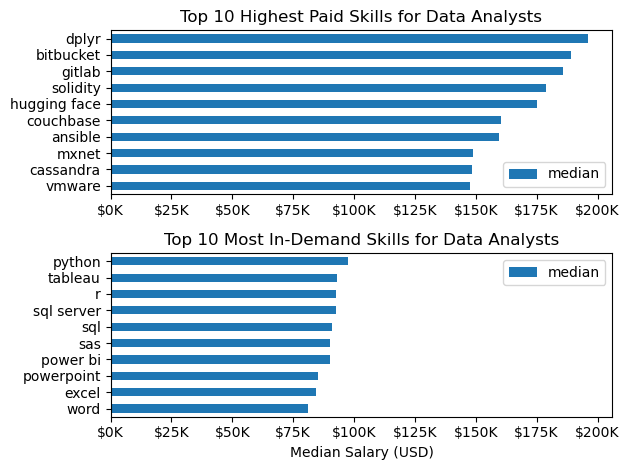

In [6]:
fig, ax = plt.subplots(2,1)
mediansalyr[::-1].plot(kind='barh', y= 'median', ax=ax[0])                                                       # [::-1] inverts axis. alternatly you can also do with code - ax[0].invert_yaxis
countsalyr[::-1].plot(kind='barh', y='median', ax=ax[1])                                                         # [::-1] inverts axis. alternatly you can also do with code - ax[0].invert_yaxis

ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))

ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim()) 
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()

seaborn version

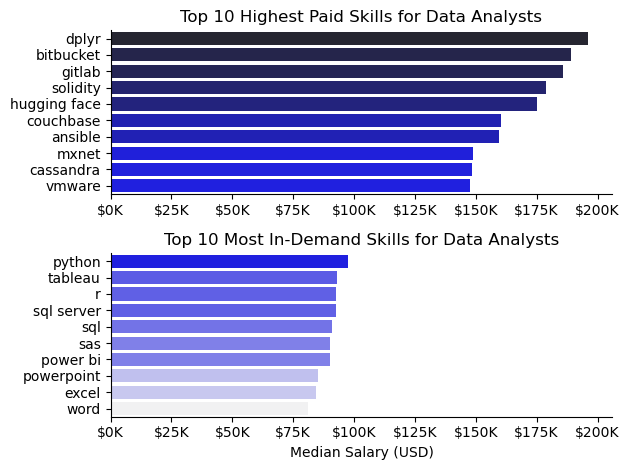

In [7]:
fig,ax = plt.subplots(2,1)
sns.barplot(data=mediansalyr, x='median', y=mediansalyr.index, hue='median', ax=ax[0], palette='dark:b_r')
sns.barplot(data=countsalyr,  x='median', y=countsalyr.index,  hue='median', ax=ax[1], palette='light:b')
sns.despine()                                                                                                                              # removes the border

ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))
ax[0].legend().remove()

ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim()) 
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[1].legend().remove()

plt.tight_layout()
plt.show()